In this study, the Titanic passenger dataset is analyzed using an Exploratory Data Analysis (EDA) approach to identify the key factors influencing passenger survival. The primary objective is to examine the relationships between the target variable **Survived** and both categorical and numerical features, and to gain a structured understanding of the dataset.

The analysis begins with a general overview of the dataset, including data types, basic statistics, and missing value handling. Categorical variables such as **gender**, **passenger class**, and **embarkation port** are analyzed in relation to survival outcomes. Additionally, numerical features including **age**, **fare**, and **family-related attributes** are explored using correlation analysis and distribution-based visualizations.

Both univariate and multivariate analyses are employed to uncover meaningful survival patterns. The insights obtained from this exploratory analysis provide a solid foundation for feature selection and guide the subsequent predictive modeling stage.


# Dataset Overview & Missing Values

This section summarizes the core preprocessing and exploration steps applied to the dataset. The dataset size and feature structure are examined, followed by a missing value analysis. Missing values in the **Age** feature are handled using median imputation, while missing values in **Embarked** are filled with the mode.

The **Cabin** feature is excluded from the analysis due to its high proportion of missing values. These steps ensure a cleaner and more consistent dataset, providing a solid foundation for subsequent exploratory analysis and modeling stages.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isnull().sum()

np.int64(0)

# Target Variable Analysis (Survived)

This section examines the distribution of the Survived variable, which indicates passenger survival status. Survived is a binary variable where 0 = did not survive and 1 = survived. The class distribution shows that non-survivors are more frequent than survivors, suggesting a mild class imbalance. This should be considered when interpreting model performance and evaluation metrics in later stages.

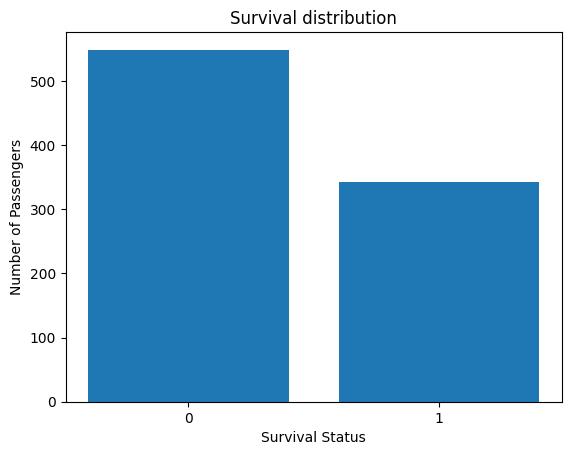

In [12]:
counts = df["Survived"].value_counts().sort_index()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.title("Survival distribution")
plt.show()


# Categorical Features and Survival Analysis

In this section, bivariate analysis is performed to examine the relationship between the **Survived** variable and key categorical features. Survival rates are analyzed across different categories such as **gender**, **passenger class (Pclass)**, and **embarkation port (Embarked)**.

Normalized bar charts are used to compare survival proportions within each category rather than absolute counts. This approach allows for a clearer interpretation of how survival likelihood varies between groups and helps identify categorical features that have a strong association with passenger survival.


In [13]:
def plot_categorical_survival(df, features, titles, xlabels):
    fig, axes = plt.subplots(1,len(features) , figsize=(15,6))

    if len(features) == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        survival_table = pd.crosstab(
            df[feature],
            df['Survived'],
            normalize='index'
        )

        survival_table.plot(
            kind='bar',
            ax=axes[i]
        )

        axes[i].set_title(titles[i])
        axes[i].set_xlabel(xlabels[i])
        axes[i].set_ylabel('Survival Rate')
        axes[i].legend(title='Survived', labels=['No', 'Yes'])

    plt.tight_layout()
    plt.show()

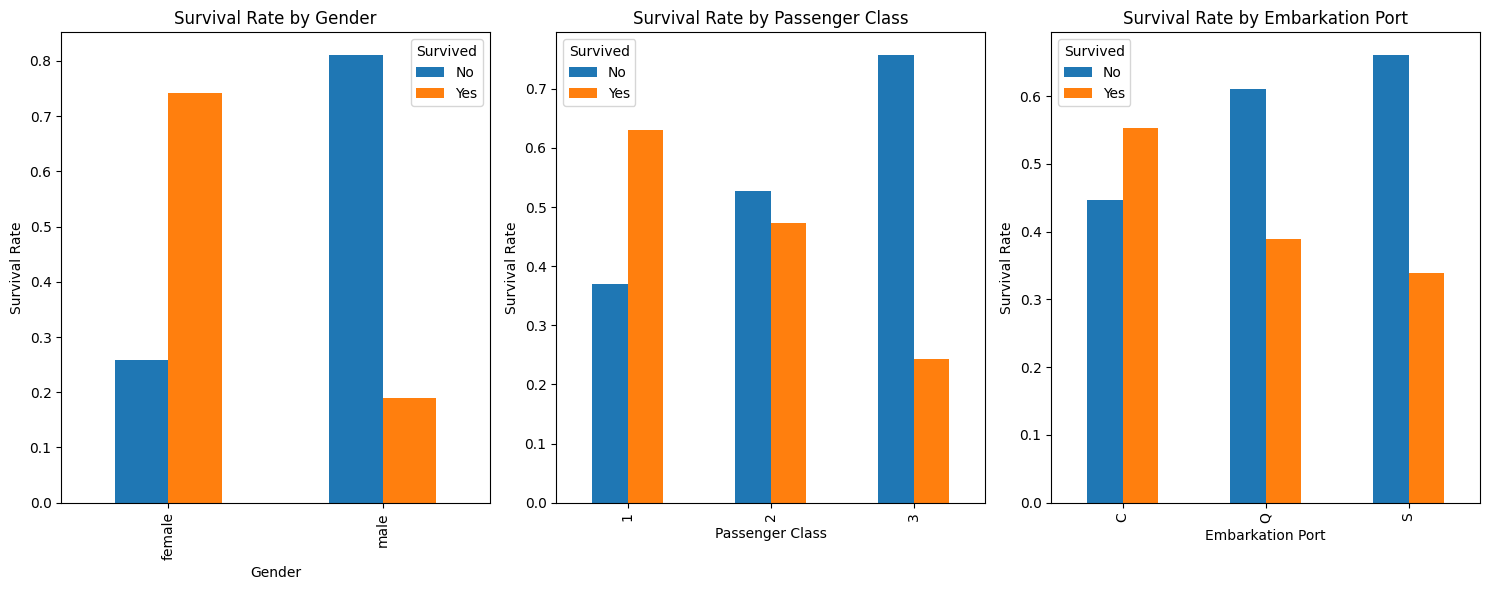

In [14]:
features = ['Sex', 'Pclass', 'Embarked']
titles = [
    'Survival Rate by Gender',
    'Survival Rate by Passenger Class',
    'Survival Rate by Embarkation Port'
]
xlabels = ['Gender', 'Passenger Class', 'Embarkation Port']

plot_categorical_survival(df, features, titles, xlabels)


In [15]:
def plot_pairwise_categorical_survival(df, pairs, titles, xlabels):
   
    fig, axes = plt.subplots(1, len(pairs), figsize=(20, 6))

    for i, (feature1, feature2) in enumerate(pairs):
        survival_table = pd.crosstab(
            [df[feature1], df[feature2]],
            df['Survived'],
            normalize='index'
        )

        survival_table.plot(
            kind='bar',
            ax=axes[i]
        )

        axes[i].set_title(titles[i])
        axes[i].set_xlabel(xlabels[i])
        axes[i].set_ylabel('Survival Rate')
        axes[i].legend(title='Survived', labels=['No', 'Yes'])

    plt.suptitle(
        'Pairwise Categorical Feature Interactions vs Survival',
        fontsize=14
    )
    plt.tight_layout()
    plt.show()


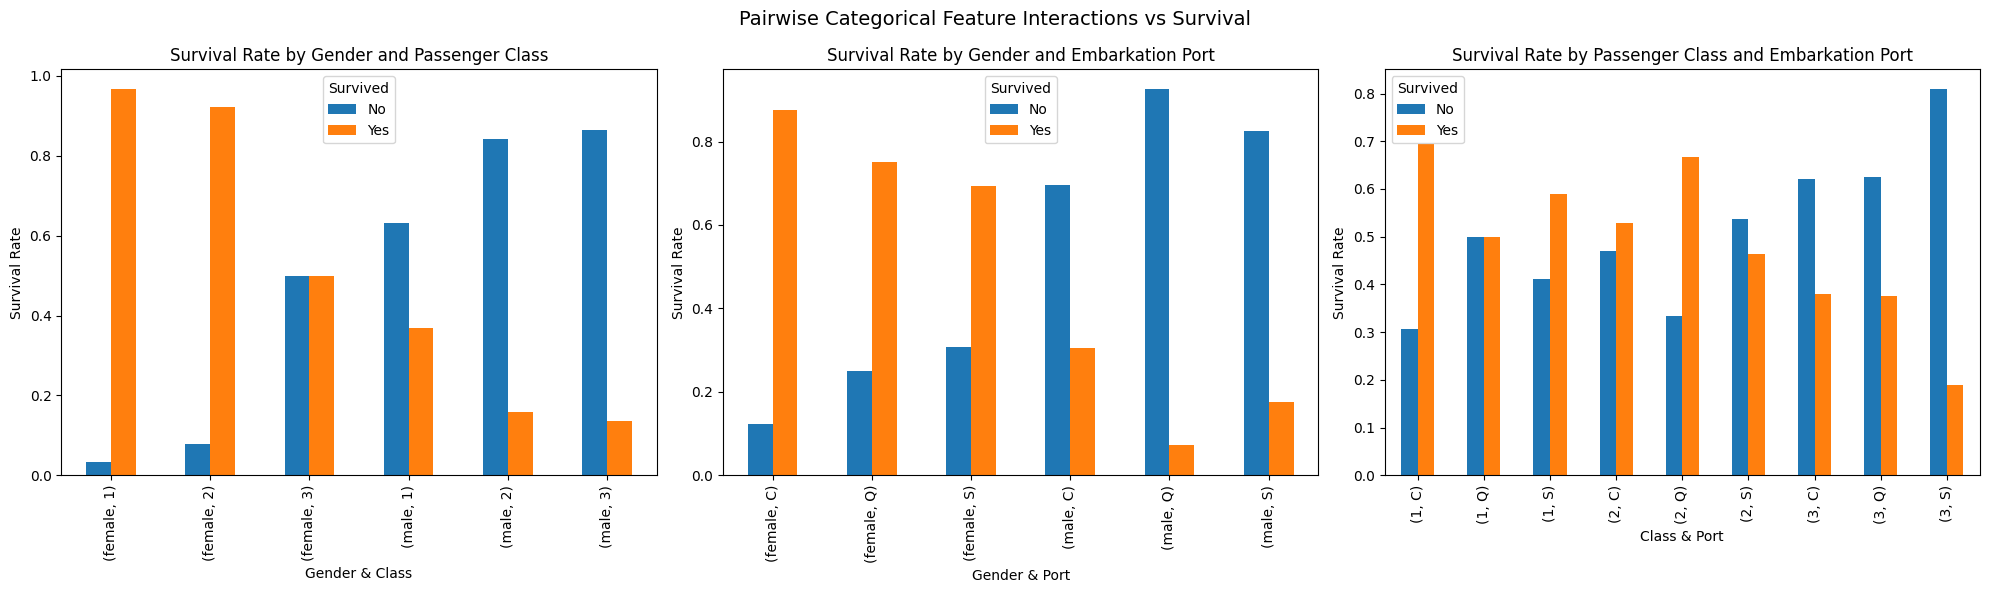

In [16]:
pairs = [
    ('Sex', 'Pclass'),
    ('Sex', 'Embarked'),
    ('Pclass', 'Embarked')
]

titles = [
    'Survival Rate by Gender and Passenger Class',
    'Survival Rate by Gender and Embarkation Port',
    'Survival Rate by Passenger Class and Embarkation Port'
]

xlabels = [
    'Gender & Class',
    'Gender & Port',
    'Class & Port'
]

plot_pairwise_categorical_survival(df, pairs, titles, xlabels)


In [17]:
pd.crosstab(
    [df['Sex'], df['Pclass'], df['Embarked']],
    df['Survived'],
    normalize='index'
)


Survived                       0         1
Sex    Pclass Embarked                    
female 1      C         0.023256  0.976744
              Q         0.000000  1.000000
              S         0.040000  0.960000
       2      C         0.000000  1.000000
              Q         0.000000  1.000000
              S         0.089552  0.910448
       3      C         0.347826  0.652174
              Q         0.272727  0.727273
              S         0.625000  0.375000
male   1      C         0.595238  0.404762
              Q         1.000000  0.000000
              S         0.645570  0.354430
       2      C         0.800000  0.200000
              Q         1.000000  0.000000
              S         0.845361  0.154639
       3      C         0.767442  0.232558
              Q         0.923077  0.076923
              S         0.871698  0.128302

# Numerical Features vs Survival Analysis

In this section, the relationship between survival status and numerical features is analyzed. First, a correlation matrix is used to examine linear relationships between Survived, Age, Fare, SibSp, and Parch. Subsequently, boxplots are employed to compare the distributions of these variables for survivors and non-survivors.

This combined approach provides both a global overview of relationships through correlation analysis and a clearer, more interpretable comparison of how each numerical feature differentiates between survival outcomes.

In [18]:
corr_matrix = df[['Survived','Age','Fare','SibSp','Parch']].corr()


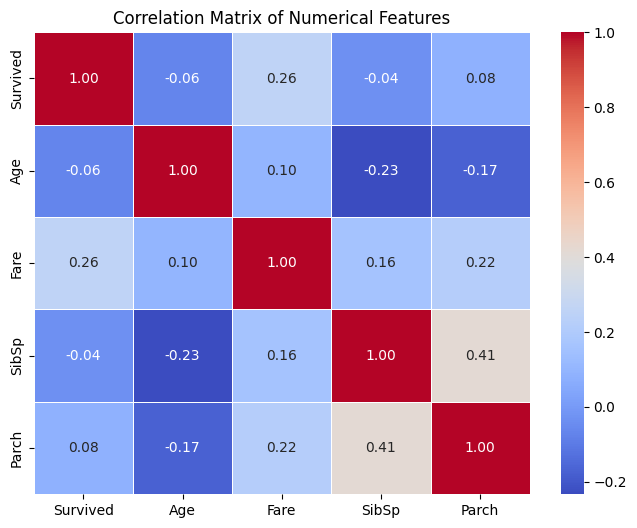

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [20]:
def plot_numerical_survival_grid(df, features, titles, ylabels):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        df.boxplot(
            column=feature,
            by='Survived',
            ax=axes[i]
        )
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Survival Status (0 = No, 1 = Yes)')
        axes[i].set_ylabel(ylabels[i])

    plt.suptitle('Numerical Features vs Survival Status', fontsize=14)
    plt.tight_layout()
    plt.show()


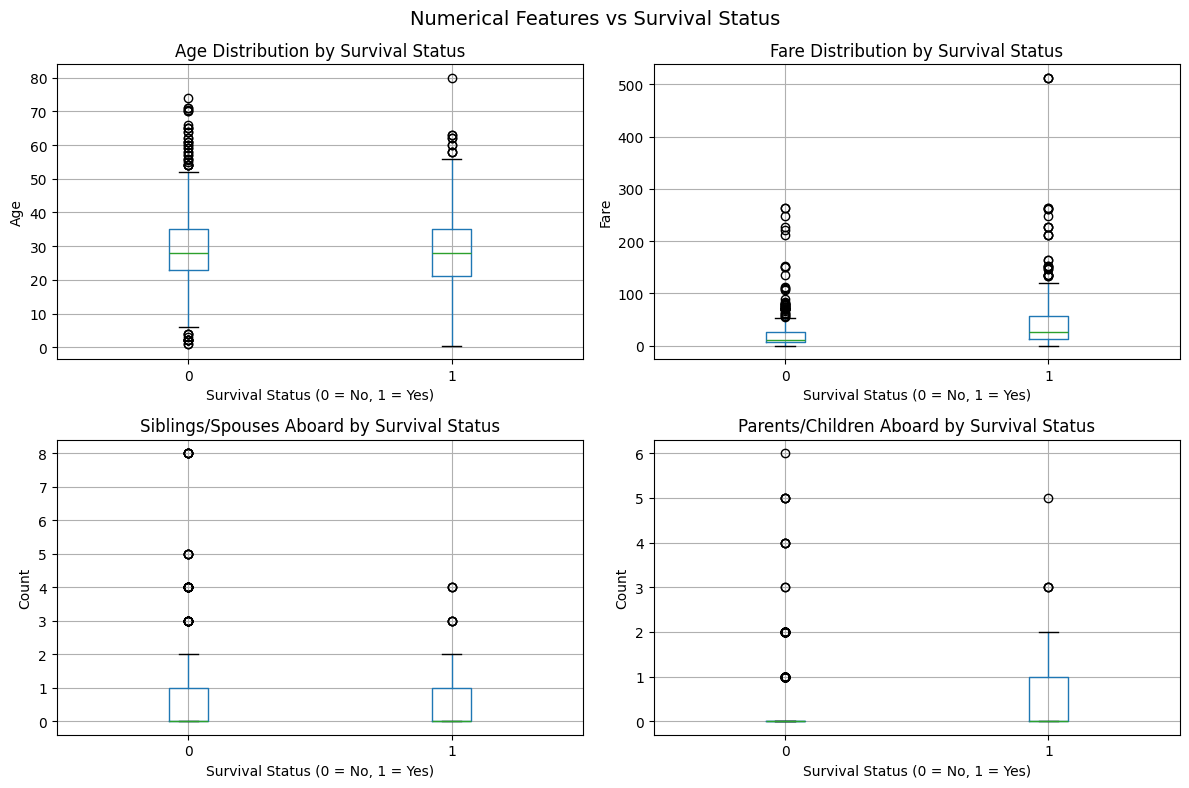

In [21]:
features=['Age', 'Fare', 'SibSp', 'Parch']
titles = [
    'Age Distribution by Survival Status',
    'Fare Distribution by Survival Status',
    'Siblings/Spouses Aboard by Survival Status',
    'Parents/Children Aboard by Survival Status'
]
ylabels = ['Age', 'Fare', 'Count', 'Count']

plot_numerical_survival_grid(df, features, titles, ylabels)

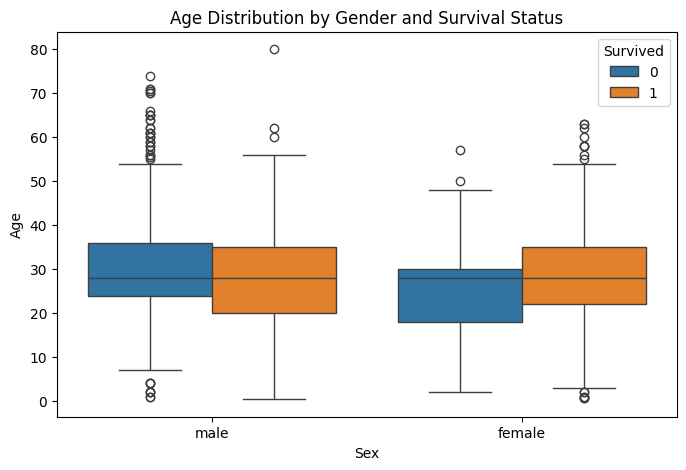

In [22]:

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Sex',
    y='Age',
    hue='Survived',
    data=df
)

plt.title('Age Distribution by Gender and Survival Status')
plt.show()

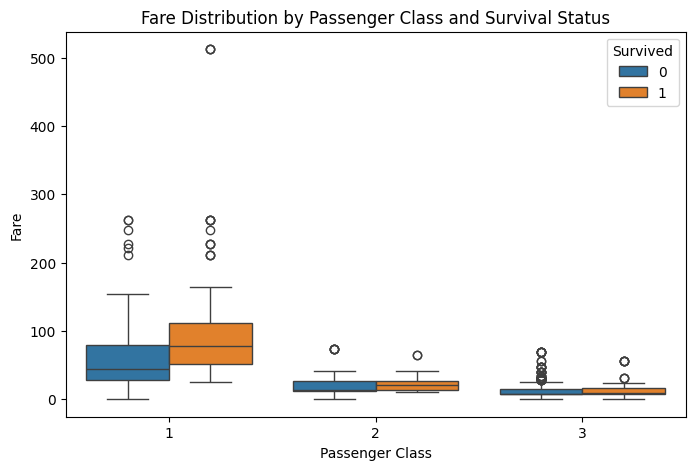

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Pclass',
    y='Fare',
    hue='Survived'
)

plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

# Results and Key Findings

Based on the exploratory data analysis (EDA) conducted on the Titanic passenger dataset, the main factors influencing survival can be summarized as follows:

* **Gender** is one of the strongest determinants of survival. Female passengers exhibit a significantly higher survival rate compared to male passengers. This pattern reflects the impact of gender-based prioritization during the evacuation process.

* An inverse relationship is observed between **passenger class (Pclass)** and survival. Passengers traveling in first class have the highest survival rates, while survival decreases substantially in third class. This finding indicates that socio-economic status played a critical role in survival outcomes.

* When **gender and passenger class are considered jointly**, survival patterns become more distinct. **Female passengers in 1st and 2nd class** show the highest survival probabilities, whereas **3rd class male passengers** represent the most disadvantaged group in terms of survival.

* The **embarkation port (Embarked)** shows a limited effect when considered alone; however, when combined with gender and passenger class, it provides supportive information. Passengers embarking from Cherbourg (C) tend to have relatively higher survival rates.

* Among numerical features, **fare** demonstrates the strongest association with survival. Passengers who paid higher fares were more likely to survive, further reinforcing the influence of passenger class on survival probability.

* **Age** does not appear to be a strong standalone discriminator between survivors and non-survivors, as the age distributions of both groups largely overlap.

* For **family-related variables (SibSp and Parch)**, most passengers are concentrated at low values. Passengers traveling with very large family groups tend to have lower survival rates, suggesting that larger family size may negatively affect survival.

Overall, the results indicate that survival on the Titanic was **not determined by a single variable**, but rather by the **combined effects of gender and passenger class**, with fare and embarkation port acting as secondary supporting factors. These findings provide a solid foundation for feature selection and predictive modeling in subsequent stages of the analysis.
